# Digitalisierung

Viele Messungen, wie z.B. Spannungs- und Strommessungen werden am Ende mittels Analog-Digital-Umsetzer (ADU) digitalsiert, weshalb wir hier das Grundprinzip einmal erläutern möchten.

## Kennlinie

In Folge der Digitalisierung wird der unendliche Wertebereich einer analogen Größen, z.B. eine elektrischen Spannung, auf einen endlichen, diskreten **Wertebereich** abgebildet: 

$$W_B = (2^n-1) \cdot 1\,\mathrm{LSB}$$

:::{figure-md} digi_3bit
<img src="draw/digi_3bit.jpg" alt="digi_3bit" class="bg-primary mb-1" width="400px" label = digi_3bit>

Kennlinie bei der Digitalisierung unter Benutzung eines 3bit-ADU. Die Eingangssignale liegen zwischen 0-7V. 
:::

Ein kontinuierlicher analoger Spannungsmessbereich wird in viele kleine Stufen unterteilt. 
Diese gestufte **(Treppen-)Kurve** ist in {numref}`digi_3bit` dargestellt. Sie ist die reale Übertragungskurve eines 3-Bit-Analog-Digital-Umsetzers (ADU). 
Das digitale Ausgangssignal ist so lange konstant bei einem festen Wert, wie sich das analoge Eingangssignal innerhalb eines Inkrements, also 1 **LSB (least significant bit)**, verändert. An diesem Beispiel hier stellen wir Eingangssignale zwischen 0V und 7V mit einem 3-Bit-Wandler dar. Variiert die Eingangsspannung nur minimal, also beispielsweise zwischen 1,1V und 1,9V, so würde sich der digitale Ausgangswert tatsächlich nicht ändern und konstant *001* ausgeben.

## Auflösung

Es ist offentsichtlich, dass bei der Digitalisierung Informationen verloren gehen. Die analogen Spannungswerte sind beliebig genau, mit unendlich vielen Nachkommastellen, werden jedoch nur auf einen sehr begrenzten, diskreten Wertebereich mit einer limitierten Anzahl von Stufen projiziert.
Je feiner die Stufen (also je mehr Bits), desto besser wird die **Auflösung**. 
Erst wenn ein Grenzwert überschritten wird, wird die nächste *Stufe* erreicht und der Computer zeigt einen neuen Spannungswert an. Nicht aber die inkrementalen Zwischenschritte. 
Beliebig viele Bits sind jedoch nicht möglich. Außerdem wird man in der Praxis die minimal nötige Anzahl von Bits wählen, da sonst der technische Aufwand enorm ansteigt. Es ist also wichtig sich vor der Messaufgabe zu überlegen, welche Auflösung benötigt wird. Insbesondere wenn die Auflösung z.B. durch andere Parameter limitiert wird, wie z.B. die Genauigkeit der Referenzmessung und Kalibrierung. 

## Quantisierungsabweichung

Dadurch dass der Wertebereich begrenzt ist, ergeben sich absolute Messabweichungen beim Digitalisierungsprozess. Dies wird auch **absoluter Digitalisierungsfehler** genannt. 
Aus der Kennlinie kann man diesen Fehler ablesen, er ergibt sich aus dem Digitalwert und dem idealisierten Kennlinienwert. Im *worst case* beträgt die maximale Abweichung:

$$A = 1\,\mathrm{LSB}$$

Die relative Messabweichung bezogen auf den Wertebereich ist dadurch:

$$A_\mathrm{rel} = \frac{A}{W_B} = \frac{1\,\mathrm{LSB}}{(2^n-1)\cdot 1\,\mathrm{LSB}} \approx \frac{1}{2^n}$$

Für einen A-D-Wandler mit einer Auflösung von 10 Bit ist die relative Abweichung infolge der Quantisierung anzugeben: 

$$A_\mathrm{rel} = \frac{1}{2^{10}} = 0,00097 = 0,001 = 0,1\% $$

In [1]:
n_bits = 10
print('rel. Abweichung: \t\t\t', 1/(2**n_bits-1)*100, '%')
print('rel. Abweichung (Näherungsformel): \t', 1/2**n_bits*100, '%')

rel. Abweichung: 			 0.09775171065493646 %
rel. Abweichung (Näherungsformel): 	 0.09765625 %


```{warning} 
Für kleine Spannungen, die den Wertebereich des ADUs nicht ausnutzen, sollte zuerst eine Verstärkerstufe so vorgeschaltet werden, dass der komplette diskrete Wertebereich ausgenutzt wird. Befindet sich die analoge Messgröße nur innerhalb eines LSB's, wäre dies sehr ungünstig.
```

## Nyquist-Shannon-Abtasttheorem

Nicht nur im Wertebereich, sondern auch bei der zeitlichen Diskretisierung können Abweichungen und Fehler auftreten. 

:::{figure-md} abtastung2
<img src="draw/abtastung.jpg" alt="abtastung" class="bg-primary mb-1" width="500px" label = abtastung2>

Aliasing Effekt in einem sinusförmigen Messsignal aufgrund der Wahl einer zu kleinen Abtastfrequenz.
:::

Wie in {numref}`abtastung2` werden nur zu bestimmten, diskreten Zeitpunkten $T_A$ die Messdaten $u_k$ abgespeichert, wodurch nur eine endliche Zahl von *Proben* genommen wird.
Ein ADU kann nicht beliebig schnell werden wodurch der Zeitpunkt zwischen zwei Messwertaufnahmen nicht beliebig klein werden kann und wir entnehmen lediglich eine *Stichprobe* zu ganz bestimmten Zeitpunkten. Dazwischen wird kein Messsignal aufgezeichnet. Diese Art die Diskretisierung muss jedoch nicht immer zu Informationsverlusten führen, wenn man das **Nyquist-Shannon Abtasttheorem**

$$f_\mathrm{ab} > 2f$$

einhält. Dies besagt, dass eine Schwingung innerhalb einer Periode mindestens 2-mal abgetastet werden soll. Dann kann man das Signal wieder vollständig rekonstruieren. Wenn dies eingehalten wird, entstehen keine Messabweichungen bei der besagten Signalfrequenz!

Sollte ein Signal aus mehreren Frequenzen bestimmen, so ist immer die höchste zu erwartende Frequenz im Signal als Anhaltspunkt für das Abtasttheorem zu nehmen. Die **Nyquist-(Abtast-) Frequenz** $f_\mathrm{ab}$ wird entsprechend dieser höchsten Frequenz gewählt. 

In Kapitel [Fourier-Analyse](3_FourierAnalyse.ipynb) ist gezeigt, dass bestimmte Signale wie z.B. Rechteckpulse, aber auch Einzelpulse, in der Theorie beliebig steile Flanken haben. Das heißt eine Rechteckspannung hat unendliche hohe Frequenzen, welches mit Zeitintervallen von 0 Skeunden Länge abgetastet werden müsste um die benötigte Abtastfrequenz $2\cdot \infty$ zu erreichen. Dies ist durch die Digitalisierung nicht möglich und in diesem Fall ist zwangsläufig mit einem Informationsverlust zu rechnen.

Andersherum gibt der vorliegende ADU vor, welche Signale und Signalfrequenzen mit diesem Gerät noch verlustfrei analysiert werden können. Hat das vorliegende Messsystem eine Abtastfrequenz (auch Sampling-Frequenz oder Bandbreite genannt) von $f_\mathrm{ab} = 100\,\mathrm{MHz}$, so können nur Signale mit Frequenzanteilen bis zu $f = 50\,\mathrm{MHz}$ verlustfrei analysiert werden. 

## Aliasing

Sollte ein zu digitalisierendes Messsignale bekannterweise aus höheren Frequenzen bestehen, sollten diese vor derm Digitalisierungsprozess heraus gefiltert werden, da ansonsten **Aliasing** auftreten wird. 

Nehmen wir im Folgenden an, dass wir ein Signal in einen ADU einspeisen, was höhere Frequenzanteile besitzt als der ADU theoretisch abtasten kann. Das bedeutet, dass bei diesen Schwingungen nicht mehr 2 Punkte pro Periode abgetastet werden können und das Nyquist-Shannon-Theorem wird verletzt. 
Der eigentliche Signalverlauf kann also nicht eindeutig rekonstruiert werden und man erhält *irgendeinen* anderen Verlauf. 
In {numref}`alisaing` sieht man das Beispiel für 2,6 Abtastungen pro Periode (oben links), 1,4 Abtastungen (oben rechts), 2 Abtastungen (unten links) und 0,8 Abtastungen (unten rechts). Abtastungenspunkte, die 2 pro Periode unterschreiten, zeigen eine falsch-rekonstruierte Wellenform auf, was durch die rote Linie verdeutlicht werden soll. 

:::{figure-md} alisaing
<img src="draw/alisaing.jpg" alt="alisaing" class="bg-primary mb-1" width="600px" label = alisaing>

Aliasing Effekt in einem sinusförmigen Messsignal aufgrund der Wahl einer zu kleinen Abtastfrequenz.
:::

Im Folgenden untersuchen wir eine Überlagerung von zwei Sinussignalen für unterschiedliche Abtastfrequenzen:

$$u(t) = u_1(t) + u_2(t)$$

$$u_1(t) = 4 \cdot \sin(2\pi 5\,\mathrm{Hz} \cdot t)$$

$$u_1(t) = 2 \cdot \sin(2\pi 50\,\mathrm{Hz} \cdot t)$$

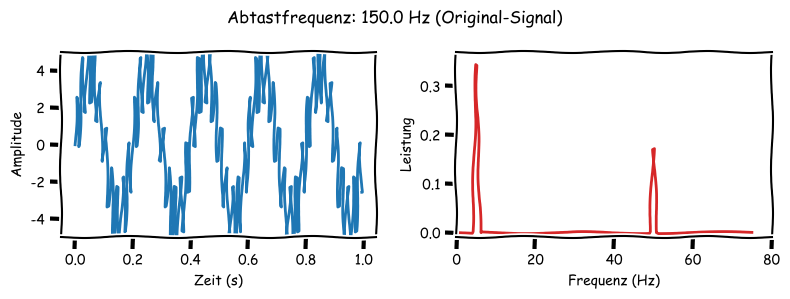

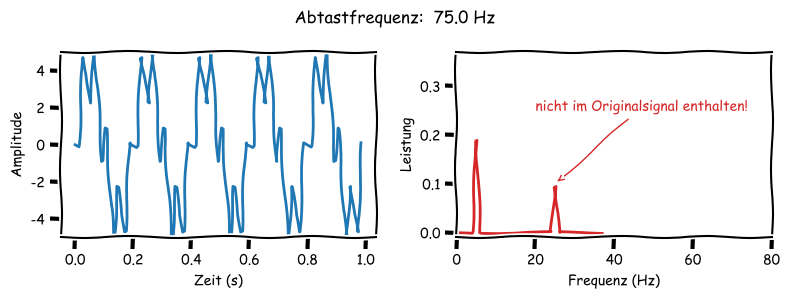

In [2]:
from scipy.fft import rfft, rfftfreq
from scipy.io.wavfile import read #import the required function from the module
import matplotlib.pyplot as plt
import numpy as np
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße 

Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector
ff = 5;   # frequency of the signal
a1 = 4.
a2 = 2.
y =  a1 * np.sin(2 * np.pi * ff * t) + a2 * np.sin(10 * 2 * np.pi * ff * t)

y_normalized = np.int16((y / y.max()) * 32767)
yf = rfft(y_normalized)/5e6
xf = rfftfreq(len(y), 1 / Fs)

plt.figure(figsize=(8,3)) # Plot-Größe
plt.subplot(1,2,1)
plt.plot(t,y)
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.ylim(-5,5)
plt.subplot(1,2,2)
plt.plot(xf,abs(yf),'tab:red') # plotting the spectrum
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung')
plt.ylim(-0.01,0.37)
plt.xlim(-0.1,80)
plt.suptitle(r'Abtastfrequenz: %5.1f Hz (Original-Signal)' %(Fs))
plt.tight_layout()
plt.show()

# Sampling frequenz: nur jedes n-te Element als Stichprobe aus dem Array rauspicken
n = 2
Fs_n = Fs/n
y_n = y[::n]
t_n = t[::n]

y_normalized = np.int16((y_n / y_n.max()) * 32767)
yf = rfft(y_normalized)/5e6
xf = rfftfreq(len(y_n), 1 / Fs_n)

plt.figure(figsize=(8,3)) # Plot-Größe
plt.subplot(1,2,1)
plt.plot(t_n,y_n)
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.ylim(-5,5)
plt.subplot(1,2,2)
plt.plot(xf,abs(yf),'tab:red') # plotting the spectrum
plt.annotate('nicht im Originalsignal enthalten!', xy=(25, 0.1),
            xytext=(20, 0.25), color = 'tab:red',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", color = 'tab:red')
            )
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung')
plt.ylim(-0.01,0.37)
plt.xlim(-0.1,80)
plt.suptitle(r'Abtastfrequenz: %5.1f Hz' %(Fs_n))
plt.tight_layout()
plt.show()

In der Simulation sieht man, dass bei der Wahl einer zu kleinen Abtastfrequenz ein Signal bei 25Hz auftritt, was im Originalsignal gar nicht enthalten ist. Dies liegt daran, dass die gewählte Abtastfrequenz von 75Hz das Shannon-Nyquist-Theorem für das Signal bei ursprünglich 50Hz nicht erfüllt. 
Die Frequenz wird zur halben Frequenz *runter-ge-aliased*. Außerdem erkennt man auch, dass die Signale nur noch die halbe Leistung aufweisen. Dies liegt an der Reduzierung die Abtastfrequenz um den Faktor 2.

### Anti-Aliasing-Filter

Zur Vermeidung von Alisaing werden Filter verwendet, um hohe Frequenzen im Signal vor der Digitalisierung rauszufiltern. Hierbei handelt es um steile Tiefpass-Filter höherer Ordnung um eine möglichst große Uterdrückung bei hohen Frequenzen zu erreichen. Das eigentliche, zu digitalisierende Signal sollte in seinem Frequenzverlauf jedoch möglichst nicht verändert werden durch den Filter. Daher muss man bei dem Filterdesign sehr vorsichtig sein. 

## Vorteile

Digitalisierte Messsignale haben den Vorteil, dass die Genauigkeit auch über große Distanzen erhalten bleiben und sie somit gut übertragen werden können. Außerdem ist die Weiterverarbeitung und Datenanalyse einfacher. 
Bei analogen Messsignalen hat man das Problem, dass äußere Störungen das Messsignal stark verändern können, wie z.B. Drift- oder Rauscheigenschaften von elektronischen Komponenten. 
Viele empfinden analoge Messwerte jedoch angenehmer und übersichtlicher, als Reihen von Zahlen auf dem Computer. 
Der wichtigste Vorteil von analogen Messwerten ist jedoch die große Bandbreite und großer Wertebereich und die simultane Verarbeitung. Gerade bei dynamischen Systen kann dies ein großer Vorteil sein, wenn man sich schnell verändernde zeitliche Messgrößen hat. 